# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing dataset

In [2]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.shape

(30, 2)

In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
X = df.iloc[:,0].values
y= df.iloc[:,1].values

In [6]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [7]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train

array([ 6. ,  8.7,  9.5,  6.8,  1.1,  9.6,  1.5,  2.9, 10.5,  3. ,  7.9,
        3.2,  4. ,  2. ,  3.7,  3.9,  2.2,  9. , 10.3,  8.2,  5.9,  4.5,
        1.3,  4.9])

In [10]:
X_train.shape

(24,)

# Importing Linear Model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

# Fitting X_train and X_test in Model
- fit function always takes 2D array so converting X_train from 1D array to 2D array

In [13]:
model.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [14]:
y_predict = model.predict(X_test.reshape(-1,1))

In [15]:
y_predict

array([63768.23239099, 64707.37234074, 75977.05173784, 92881.57083349,
       56255.11279292, 74098.77183833])

In [16]:
df_final = pd.DataFrame({'Actual_value':y_test,'Predicted_value':[round(x) for x in y_predict]})

In [17]:
df_final

,Actual_value,Predicted_value
0,55794.0,63768
1,57081.0,64707
2,83088.0,75977
3,98273.0,92882
4,64445.0,56255
5,66029.0,74099


# Visualizing Results

<AxesSubplot:>

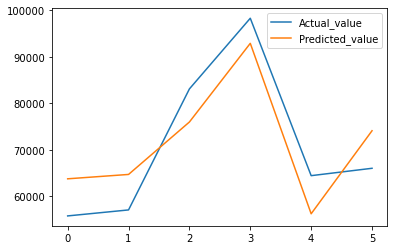

In [18]:
df_final.plot()

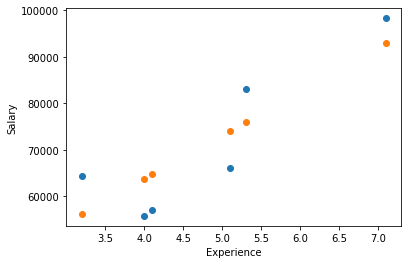

In [19]:
plt.scatter(X_test,df_final['Actual_value'])
plt.scatter(X_test,df_final['Predicted_value'])
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

Text(0.5, 1.0, 'Experience Vs Salary(Training data)')

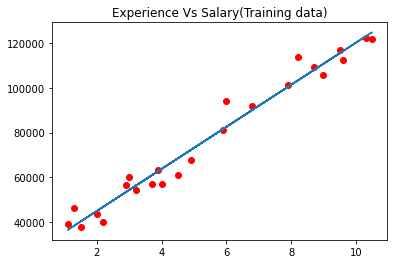

In [20]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,model.predict(X_train.reshape(-1,1)))
plt.title('Experience Vs Salary(Training data)')

Text(0.5, 1.0, 'Experience Vs Salary(Testing data)')

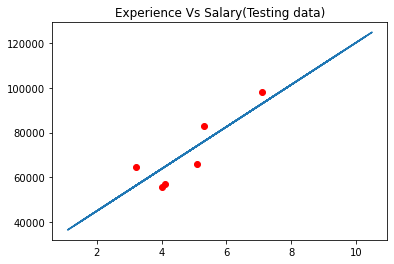

In [21]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,model.predict(X_train.reshape(-1,1)))
plt.title('Experience Vs Salary(Testing data)')

# Making a single prediction 
- (for example the salary of an employee with 12 years of experience)

In [22]:
model.predict([[12]])

array([138899.42837164])

Therefore, our model predicts that the salary of an employee with 12 years of experience is $ 138967.5.

**Important note:** Notice that the value of the feature (12 years) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting 12 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$12 \rightarrow \textrm{scalar}$

$[12] \rightarrow \textrm{1D array}$

$[[12]] \rightarrow \textrm{2D array}$

# Getting the final linear regression equation with the values of the coefficients

In [23]:
print(f'Coefficients: {model.coef_}')
print(f'Y-intercept: {model.intercept_}')

Coefficients: [9391.39949758]
Y-intercept: 26202.63440065991


Therefore, the equation of our simple linear regression model is:

$$\textrm{Salary} = 9345.94 \times \textrm{YearsExperience} + 26816.19$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.